In [40]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [41]:
os.chdir(r"C:\Users\HP\Desktop\projects")

In [42]:
os.listdir()

['Companies.csv',
 'ipl_data.csv',
 'projects-checkpoint.ipynb',
 'projects.ipynb',
 'top_companies_data_scrapingg.ipynb.url']

In [43]:
df=pd.read_csv("ipl_data.csv")

C:\Users\HP\AppData\Local\Temp\ipykernel_5080\465112554.py:1: DtypeWarning: Columns (2,3,4,6,7,8,9,10,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("ipl_data.csv")


In [44]:
df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,run
0,335982.0,2008.0,18-04-2008,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0
1,335982.0,2008.0,18-04-2008,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,335982.0,2008.0,18-04-2008,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
3,335982.0,2008.0,18-04-2008,M Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,335982.0,2008.0,18-04-2008,M Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   match_id                243815 non-null  float64
 1   season                  243815 non-null  float64
 2   start_date              243815 non-null  object 
 3   venue                   243815 non-null  object 
 4   innings                 243816 non-null  object 
 5   ball                    243816 non-null  float64
 6   batting_team            243815 non-null  object 
 7   bowling_team            243815 non-null  object 
 8   striker                 243815 non-null  object 
 9   non_striker             243815 non-null  object 
 10  bowler                  243815 non-null  object 
 11  runs_off_bat            243815 non-null  float64
 12  extras                  243815 non-null  float64
 13  wides                   7652 non-null    float64
 14  noballs           

# GENERAL ANALYSES OF THE MATCH

In [46]:
df["season"].unique()

array([2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015., 2016.,
       2017., 2018., 2019., 2020., 2021., 2022., 2023.,   nan])

In [47]:
df.iloc[0]

match_id                                     335982.0
season                                         2008.0
start_date                                 18-04-2008
venue                           M Chinnaswamy Stadium
innings                                             1
ball                                              0.1
batting_team                    Kolkata Knight Riders
bowling_team              Royal Challengers Bangalore
striker                                    SC Ganguly
non_striker                               BB McCullum
bowler                                        P Kumar
runs_off_bat                                      0.0
extras                                            1.0
wides                                             NaN
noballs                                           NaN
byes                                              NaN
legbyes                                           1.0
penalty                                           NaN
wicket_type                 

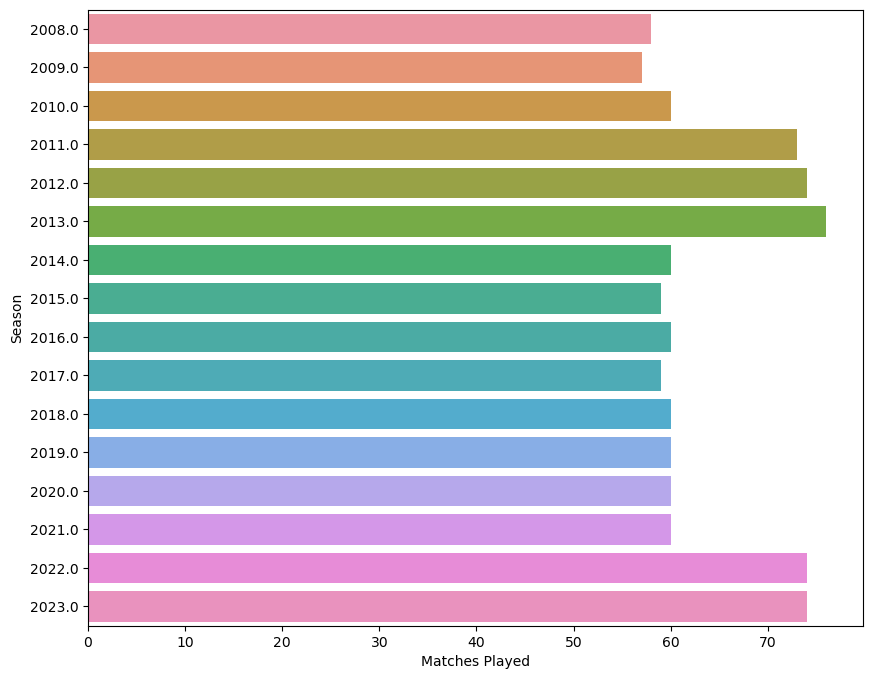

In [48]:
#season wise IPL matches
plt.figure(figsize=(10,8))
data = df.groupby(["match_id","season"]).count().index.droplevel(level=0).value_counts().sort_index()
sns.barplot(y=data.index,x=data,orient="h")
plt.xlabel("Matches Played")
plt.ylabel("Season")
plt.show()

In [49]:
# Most IPL match played in the venue
df.groupby(["venue","match_id"]).count().droplevel(level=1).index.value_counts()

Eden Gardens                                                             77
Wankhede Stadium                                                         73
M Chinnaswamy Stadium                                                    65
Feroz Shah Kotla                                                         60
Rajiv Gandhi International Stadium, Uppal                                49
MA Chidambaram Stadium, Chepauk                                          48
Sawai Mansingh Stadium                                                   47
Dubai International Cricket Stadium                                      46
Wankhede Stadium, Mumbai                                                 38
Punjab Cricket Association Stadium, Mohali                               35
Sheikh Zayed Stadium                                                     29
Sharjah Cricket Stadium                                                  28
Maharashtra Cricket Association Stadium                                  22
Dr DY Patil 

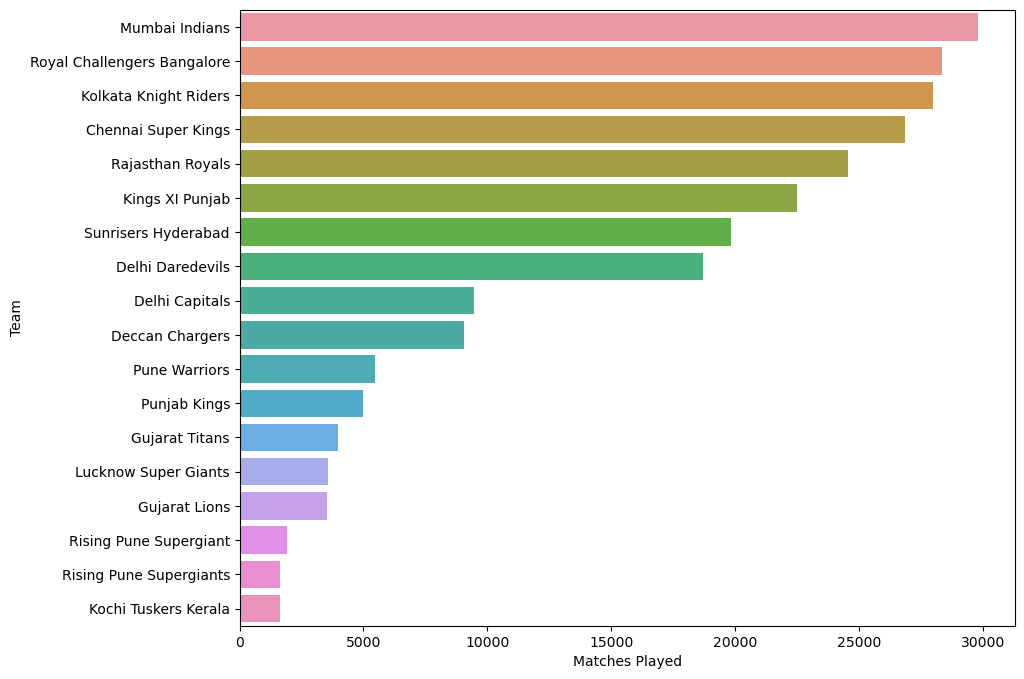

In [50]:
#IPL matches played by each team
plt.figure(figsize=(10,8))
data = df['bowling_team'].value_counts().sort_values(ascending=False)
sns.barplot(y=data.index,x=data,orient='h')
plt.xlabel('Matches Played')
plt.ylabel('Team')
plt.show()

# BATTING ANALYSIS

In [51]:
#Most Runs bat Scored by IPL Teams
df.groupby(["batting_team"])["run"].sum().sort_values(ascending=False)

batting_team
Mumbai Indians                 40920.0
Royal Challengers Bangalore    38863.0
Kolkata Knight Riders          37915.0
Chennai Super Kings            37229.0
Rajasthan Royals               33099.0
Kings XI Punjab                30921.0
Sunrisers Hyderabad            26846.0
Delhi Daredevils               25086.0
Delhi Capitals                 12698.0
Deccan Chargers                11791.0
Punjab Kings                    7322.0
Pune Warriors                   6551.0
Gujarat Titans                  5911.0
Lucknow Super Giants            5227.0
Gujarat Lions                   5013.0
Rising Pune Supergiant          2529.0
Rising Pune Supergiants         2130.0
Kochi Tuskers Kerala            2001.0
Name: run, dtype: float64

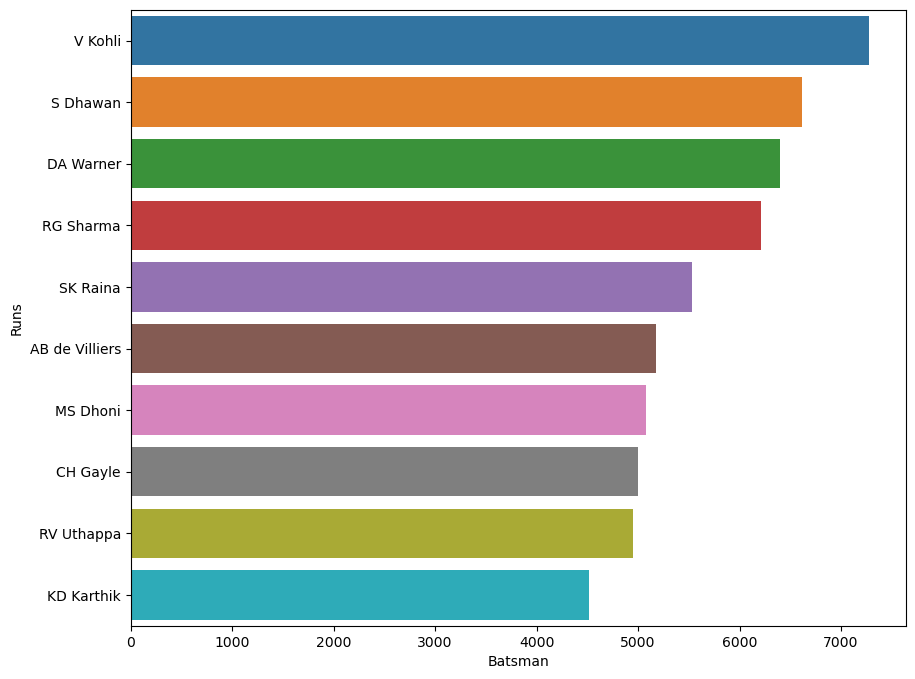

In [52]:
#Most ipl runs by batsman
plt.figure(figsize=(10,8))
data = df.groupby(['striker'])['runs_off_bat'].sum().sort_values(ascending=False)[:10]
sns.barplot(y=data.index,x=data,orient='h')
plt.xlabel('Batsman')
plt.ylabel('Runs')
plt.show()

In [54]:
#Average run by teams in power play
df[df["ball"]<6].groupby(["match_id","batting_team"]).sum()["run"].groupby("batting_team").mean().sort_values(ascending=False)[2:]

C:\Users\HP\AppData\Local\Temp\ipykernel_5080\2319636252.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df[df["ball"]<6].groupby(["match_id","batting_team"]).sum()["run"].groupby("batting_team").mean().sort_values(ascending=False)[2:]


batting_team
Kochi Tuskers Kerala           51.642857
Gujarat Titans                 51.636364
Delhi Capitals                 50.857143
Rising Pune Supergiant         50.437500
Sunrisers Hyderabad            49.126506
Kings XI Punjab                48.742105
Kolkata Knight Riders          48.375527
Mumbai Indians                 48.279352
Lucknow Super Giants           47.833333
Rajasthan Royals               47.565854
Chennai Super Kings            47.560538
Delhi Daredevils               47.521739
Deccan Chargers                47.360000
Royal Challengers Bangalore    47.154167
Rising Pune Supergiants        47.000000
Pune Warriors                  43.688889
Name: run, dtype: float64

In [55]:
#Most IPL century by players
runs = df.groupby(["striker","match_id"])["runs_off_bat"].sum()
runs[runs >= 100].droplevel(level=1).groupby("striker").count().sort_values(ascending=False)[:10]

striker
V Kohli           7
CH Gayle          6
JC Buttler        5
DA Warner         4
SR Watson         4
KL Rahul          4
AB de Villiers    3
SV Samson         3
Shubman Gill      3
V Sehwag          2
Name: runs_off_bat, dtype: int64

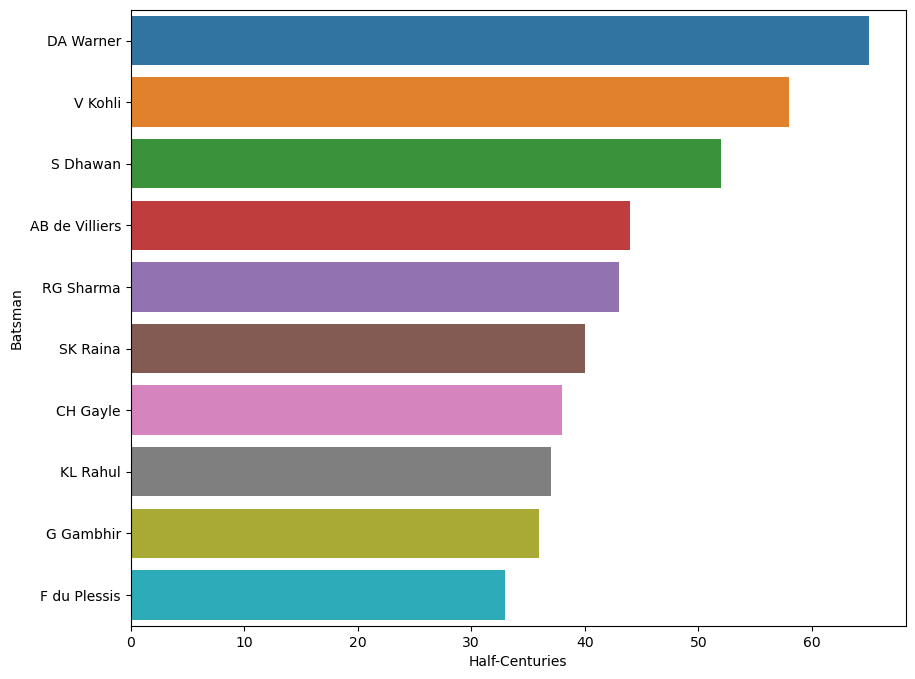

In [57]:
#Most IPL 50 by player
plt.figure(figsize=(10,8))
runs = df.groupby(["striker","start_date"])["runs_off_bat"].sum()
data = runs[runs >= 50].droplevel(level=1).groupby("striker").count().sort_values(ascending=False)[:10]
sns.barplot(y=data.index,x=data,orient='h')
plt.xlabel("Half-Centuries")
plt.ylabel("Batsman")
plt.show()

In [58]:
#Orange Cap Holder Each Season
data = df.groupby(["season","striker"])["runs_off_bat"].sum().groupby("season").max()
temp_df=pd.DataFrame(df.groupby(["season","striker"])["runs_off_bat"].sum())
print("{0:10}{1:20}{2:30}".format("Season","Player","Runs"))

for season,run in data.items():
    player = temp_df.loc[season][temp_df.loc[season]["runs_off_bat"] == run].index[0]
    print(season,"\t ",player,"\t\t",run)

Season    Player              Runs                          
2008.0 	  SE Marsh 		 616.0
2009.0 	  ML Hayden 		 572.0
2010.0 	  SR Tendulkar 		 617.0
2011.0 	  CH Gayle 		 608.0
2012.0 	  CH Gayle 		 733.0
2013.0 	  MEK Hussey 		 733.0
2014.0 	  RV Uthappa 		 660.0
2015.0 	  DA Warner 		 562.0
2016.0 	  V Kohli 		 973.0
2017.0 	  DA Warner 		 641.0
2018.0 	  KS Williamson 		 735.0
2019.0 	  DA Warner 		 692.0
2020.0 	  KL Rahul 		 676.0
2021.0 	  RD Gaikwad 		 635.0
2022.0 	  JC Buttler 		 863.0
2023.0 	  Shubman Gill 		 890.0


In [59]:
#Most sixes in an IPL inning
df[df["runs_off_bat"] == 6].groupby(["start_date","striker"]).count()["season"].sort_values(ascending=False).droplevel(level=0)[:10]

striker
CH Gayle          17
BB McCullum       13
CH Gayle          13
AB de Villiers    12
CH Gayle          12
CH Gayle          11
M Vijay           11
AD Russell        11
ST Jayasuriya     11
Shubman Gill      10
Name: season, dtype: int64

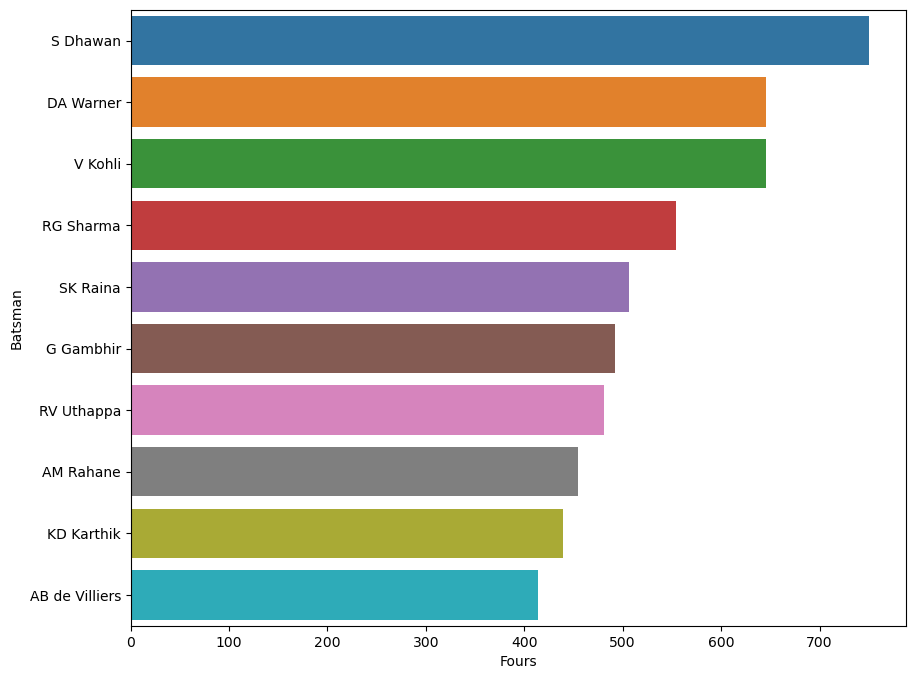

In [60]:
#Most Boundary (4s) hit by a Batsman
plt.figure(figsize=(10,8))
data = df[df['runs_off_bat'] == 4]['striker'].value_counts()[:10]
sns.barplot(y=data.index,x=data,orient='h')
plt.xlabel('Fours')
plt.ylabel('Batsman')
plt.show()

In [61]:
#Most runs in an IPL season by Player
df.groupby(["striker","season"])["runs_off_bat"].sum().sort_values(ascending=False)[:10]


striker        season
V Kohli        2016.0    973.0
Shubman Gill   2023.0    890.0
JC Buttler     2022.0    863.0
DA Warner      2016.0    848.0
KS Williamson  2018.0    735.0
MEK Hussey     2013.0    733.0
CH Gayle       2012.0    733.0
F du Plessis   2023.0    730.0
CH Gayle       2013.0    720.0
DA Warner      2019.0    692.0
Name: runs_off_bat, dtype: float64

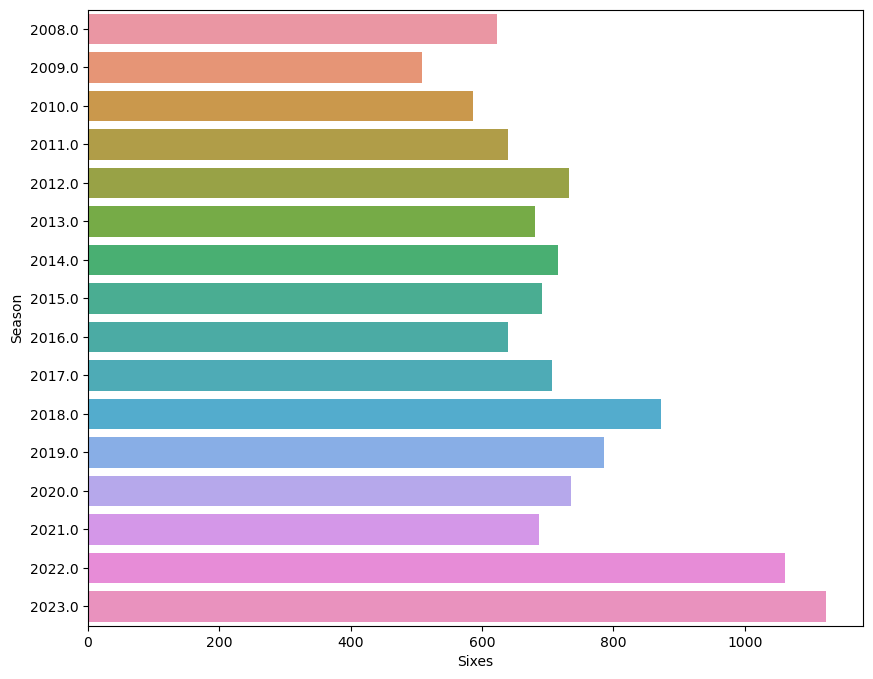

In [62]:
#No. of Sixes in IPL Seasons
plt.figure(figsize=(10,8))
data = df[df["runs_off_bat"] == 6].groupby("season").count()["match_id"].sort_values(ascending=False)
sns.barplot(y=data.index,x=data,orient="h")
plt.xlabel("Sixes")
plt.ylabel("Season")
plt.show()

In [63]:
#Highest Total by IPL Teams
df.groupby(["start_date","batting_team"]).sum()["run"].droplevel(level=0).sort_values(ascending=False)[:10]

C:\Users\HP\AppData\Local\Temp\ipykernel_5080\3013930337.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(["start_date","batting_team"]).sum()["run"].droplevel(level=0).sort_values(ascending=False)[:10]


batting_team
Royal Challengers Bangalore    271.0
Lucknow Super Giants           266.0
Royal Challengers Bangalore    250.0
Kolkata Knight Riders          250.0
Chennai Super Kings            248.0
Delhi Daredevils               245.0
Mumbai Indians                 244.0
Chennai Super Kings            244.0
Royal Challengers Bangalore    242.0
Gujarat Titans                 241.0
Name: run, dtype: float64

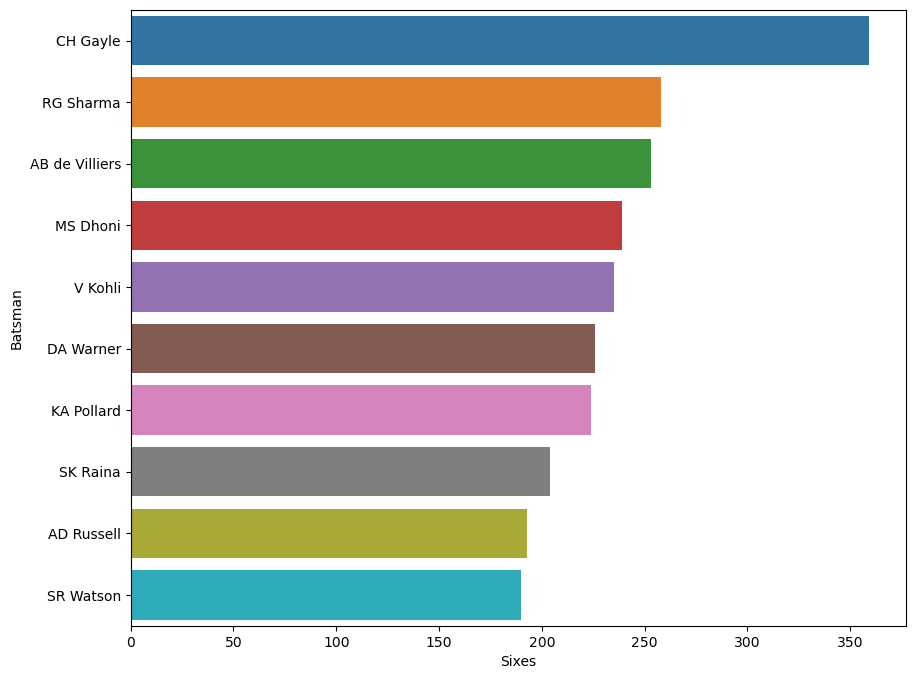

In [64]:
#Most IPL Sixes Hit by a batsman
plt.figure(figsize=(10,8))
data = df[df["runs_off_bat"] == 6]["striker"].value_counts()[:10]
sns.barplot(y=data.index,x=data,orient='h')
plt.xlabel("Sixes")
plt.ylabel("Batsman")
plt.show()

In [65]:
#Highest Individual IPL Score
df.groupby(["striker","start_date"])["runs_off_bat"].sum().sort_values(ascending=False)[:10]

striker         start_date
CH Gayle        23-04-2013    175.0
BB McCullum     18-04-2008    158.0
Q de Kock       18-05-2022    140.0
AB de Villiers  10-05-2015    133.0
KL Rahul        24-09-2020    132.0
Shubman Gill    26-05-2023    129.0
AB de Villiers  14-05-2016    129.0
CH Gayle        17-05-2012    128.0
RR Pant         10-05-2018    128.0
M Vijay         03-04-2010    127.0
Name: runs_off_bat, dtype: float64

# BOWLING STATISTICS

In [66]:
#Most run conceded by a bowler in an inning
df.groupby(['bowler','start_date'])['run'].sum().droplevel(level=1).sort_values(ascending=False)[:10]

bowler
Mohammed Siraj      74.0
Mujeeb Ur Rahman    73.0
Basil Thampi        71.0
Sandeep Sharma      70.0
M Jansen            69.0
I Sharma            69.0
Yash Dayal          69.0
PJ Cummins          69.0
AS Rajpoot          68.0
Arshdeep Singh      68.0
Name: run, dtype: float64

In [80]:
#Purple Cap Holders
lst = ['caught','bowled','lbw','stumped','caught and bowled','hit wicket']
data = df[df['wicket_type'].apply(lambda x: True if x in lst and x != ' ' else False)].groupby(['season','bowler']).count()['ball']
data=data.sort_values(ascending=False)[:30].sort_index(level=0)
val=0
lst=[]
print("{0:10}{1:20}{2:30}".format("Season","Player","Runs"))
for (season,bowler),wicket in data.items():
    if season == val:
        lst.append(wicket)        
    else:
        print(season,'\t ',bowler,'\t\t',wicket)
        val = season
        lst=[]

Season    Player              Runs                          
2009.0 	  RP Singh 		 23
2011.0 	  SL Malinga 		 28
2012.0 	  M Morkel 		 25
2013.0 	  DJ Bravo 		 32
2014.0 	  MM Sharma 		 23
2015.0 	  DJ Bravo 		 26
2016.0 	  B Kumar 		 23
2017.0 	  B Kumar 		 26
2018.0 	  AJ Tye 		 24
2019.0 	  Imran Tahir 		 26
2020.0 	  JJ Bumrah 		 29
2021.0 	  Avesh Khan 		 24
2022.0 	  K Rabada 		 23
2023.0 	  MM Sharma 		 27


In [79]:
#Most IPL Wickets by a Bowler
lst = ['caught','bowled','lbw','stumped','caught and bowled','hit wicket']
df[df['wicket_type'].apply(lambda x: True if x in lst and x != ' ' else False)]['bowler'].value_counts()[:10]

YS Chahal          187
DJ Bravo           183
PP Chawla          179
A Mishra           173
R Ashwin           171
SL Malinga         170
B Kumar            170
SP Narine          163
RA Jadeja          152
Harbhajan Singh    150
Name: bowler, dtype: int64

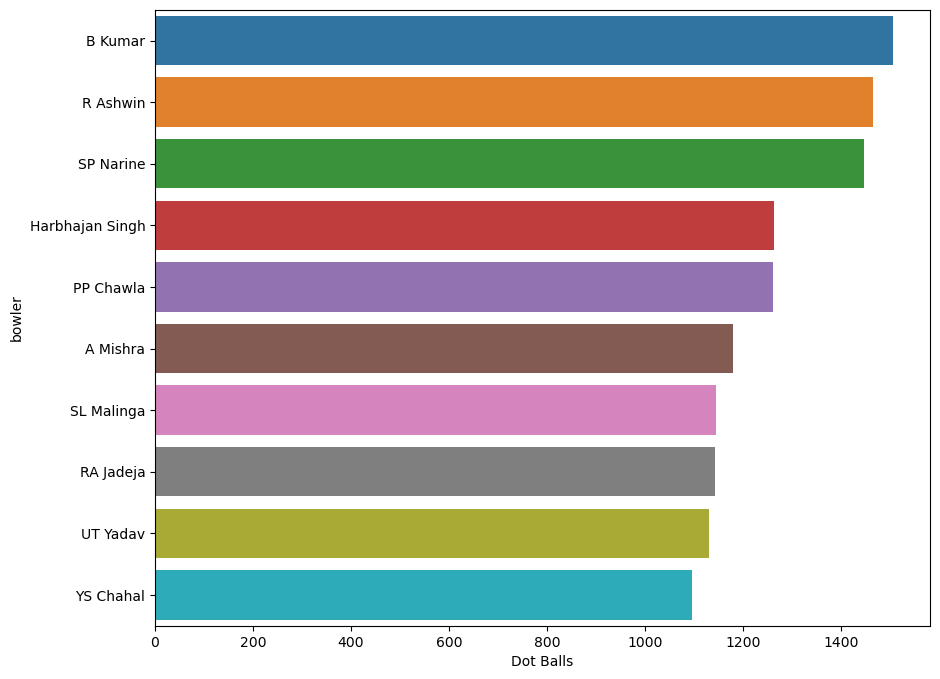

In [74]:
#Most Dot Ball by a Bowler
plt.figure(figsize=(10,8))
data = df[df['run'] == 0].groupby('bowler').count()['match_id'].sort_values(ascending=False)[:10]
sns.barplot(y=data.index,x=data,orient='h')
plt.xlabel('Dot Balls')
plt.ylabel('bowler')
plt.show()

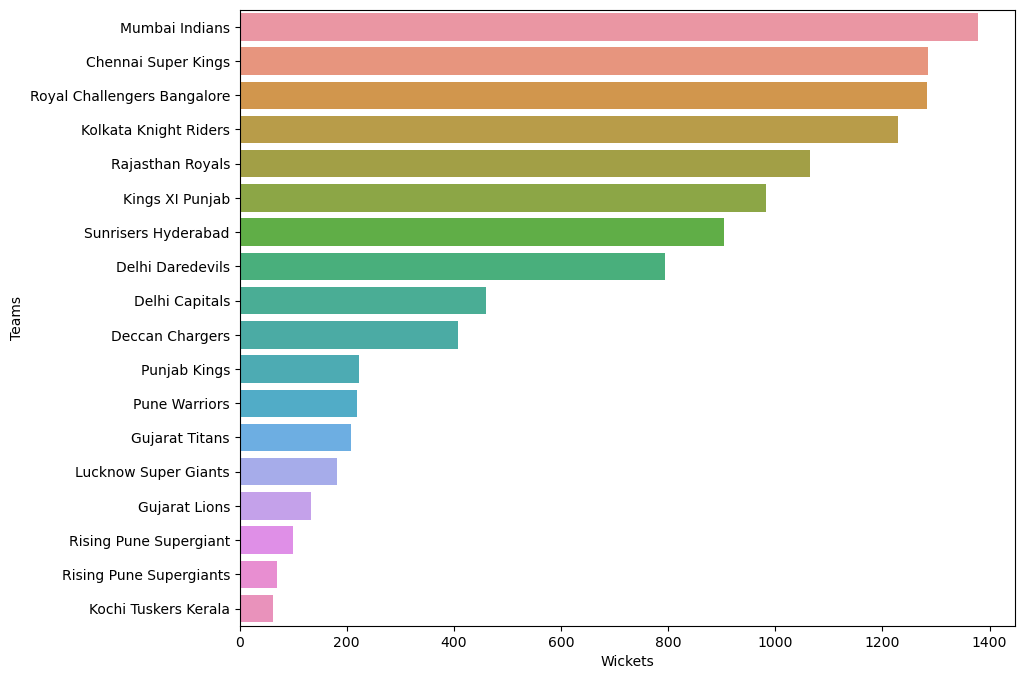

In [78]:
#Most Wickets by an IPL Team
plt.figure(figsize=(10,8))
lst = ['caught','bowled','lbw','stumped','caught and bowled','hit wicket']
data = df[df['wicket_type'].apply(lambda x: True if x in lst and x != ' ' else False)]['bowling_team'].value_counts()
df.groupby(['batting_team'])['extras'].agg('sum').sort_values(ascending=False)
sns.barplot(y=data.index,x=data,orient='h')
plt.xlabel('Wickets')
plt.ylabel('Teams')
plt.show()

In [81]:
#Most No Balls by an IPL team
df.groupby(['batting_team'])['noballs'].agg('sum').sort_values(ascending=False)

batting_team
Chennai Super Kings            128.0
Royal Challengers Bangalore    126.0
Mumbai Indians                 122.0
Rajasthan Royals               117.0
Kolkata Knight Riders          114.0
Sunrisers Hyderabad             79.0
Delhi Daredevils                73.0
Kings XI Punjab                 71.0
Deccan Chargers                 49.0
Delhi Capitals                  46.0
Punjab Kings                    33.0
Pune Warriors                   24.0
Gujarat Titans                  19.0
Gujarat Lions                   17.0
Lucknow Super Giants            16.0
Kochi Tuskers Kerala            11.0
Rising Pune Supergiants          7.0
Rising Pune Supergiant           1.0
Name: noballs, dtype: float64

In [82]:
#Most No Balls by an IPL Bowler
df[df['noballs'] != 0]['bowler'].value_counts()[:10]

R Ashwin           4333
SP Narine          3812
B Kumar            3703
PP Chawla          3680
RA Jadeja          3610
Harbhajan Singh    3496
A Mishra           3432
DJ Bravo           3296
YS Chahal          3266
UT Yadav           3061
Name: bowler, dtype: int64

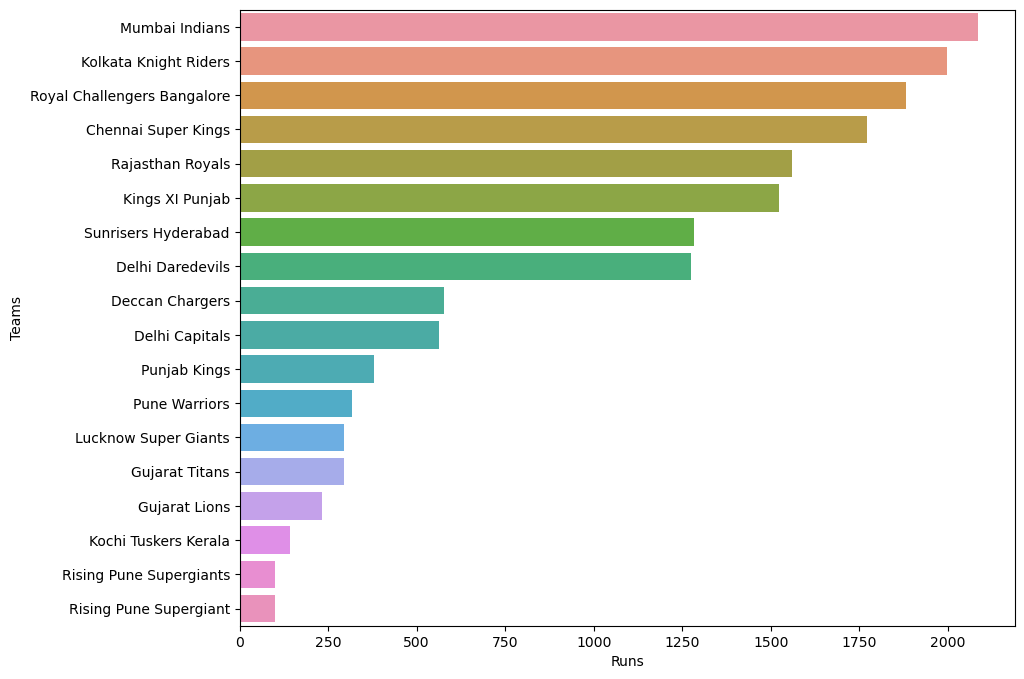

In [83]:
#Most run given by a team in Extras
plt.figure(figsize=(10,8))
data = df.groupby(['batting_team'])['extras'].agg('sum').sort_values(ascending=False)
sns.barplot(y=data.index,x=data,orient='h')
plt.xlabel('Runs')
plt.ylabel('Teams')
plt.show()

In [84]:
#Most Wides Conceded by an IPL team
df.groupby(['batting_team'])['wides'].agg('sum').sort_values(ascending=False)

batting_team
Mumbai Indians                 1191.0
Kolkata Knight Riders          1137.0
Royal Challengers Bangalore    1045.0
Chennai Super Kings             996.0
Rajasthan Royals                882.0
Kings XI Punjab                 786.0
Sunrisers Hyderabad             748.0
Delhi Daredevils                717.0
Delhi Capitals                  325.0
Deccan Chargers                 279.0
Punjab Kings                    240.0
Lucknow Super Giants            184.0
Gujarat Titans                  175.0
Pune Warriors                   169.0
Gujarat Lions                   134.0
Kochi Tuskers Kerala             89.0
Rising Pune Supergiants          60.0
Rising Pune Supergiant           58.0
Name: wides, dtype: float64